In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,48718,49191,92597,7382,16277,148,1503222,148682,28048,325051,...,1874867,10029,75094,1,108125,1402,111102,2084,18322,11358
2020-12-15,48952,50000,93065,7382,16362,148,1510203,149120,28060,327679,...,1893436,10418,75241,1,108480,1405,113409,2085,18428,11522
2020-12-16,49161,50637,93507,7446,16407,151,1517046,150218,28072,330343,...,1918736,10893,75538,1,108717,1405,115606,2085,18456,11749
2020-12-17,49378,51424,93933,7466,16484,151,1524372,151392,28093,332828,...,1954268,11436,75538,1,109081,1407,117755,2087,18504,11866
2020-12-18,49621,52004,94371,7519,16562,152,1531374,152253,28126,334913,...,1982828,11950,75675,1,109395,1410,119612,2087,18575,12047


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,191.0,661.0,495.0,44.0,89.0,0.0,5062.0,357.0,11.0,2588.0,...,20377.0,321.0,138.0,0.0,339.0,5.0,1364.0,1.0,48.0,112.0
2020-12-15,234.0,809.0,468.0,0.0,85.0,0.0,6981.0,438.0,12.0,2628.0,...,18569.0,389.0,147.0,0.0,355.0,3.0,2307.0,1.0,106.0,164.0
2020-12-16,209.0,637.0,442.0,64.0,45.0,3.0,6843.0,1098.0,12.0,2664.0,...,25300.0,475.0,297.0,0.0,237.0,0.0,2197.0,0.0,28.0,227.0
2020-12-17,217.0,787.0,426.0,20.0,77.0,0.0,7326.0,1174.0,21.0,2485.0,...,35532.0,543.0,0.0,0.0,364.0,2.0,2149.0,2.0,48.0,117.0
2020-12-18,243.0,580.0,438.0,53.0,78.0,1.0,7002.0,861.0,33.0,2085.0,...,28560.0,514.0,137.0,0.0,314.0,3.0,1857.0,0.0,71.0,181.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
US                249709.0
Brazil             52544.0
Germany            32830.0
United Kingdom     28560.0
Russia             28116.0
Turkey             26410.0
India              25152.0
France             16005.0
Italy              15401.0
Colombia           13277.0
Ukraine            13066.0
Mexico             12248.0
Netherlands        12024.0
Spain              11815.0
Poland             11010.0
Sweden              9654.0
South Africa        8725.0
Czechia             7602.0
Iran                7121.0
Argentina           7002.0
Name: 2020-12-18 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

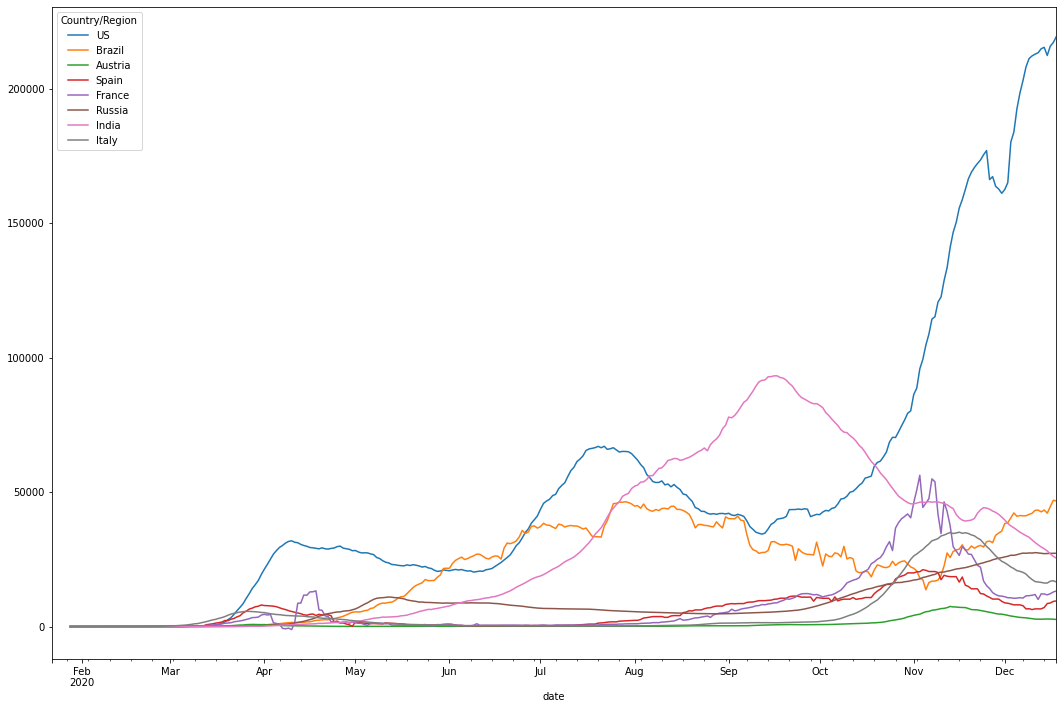

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

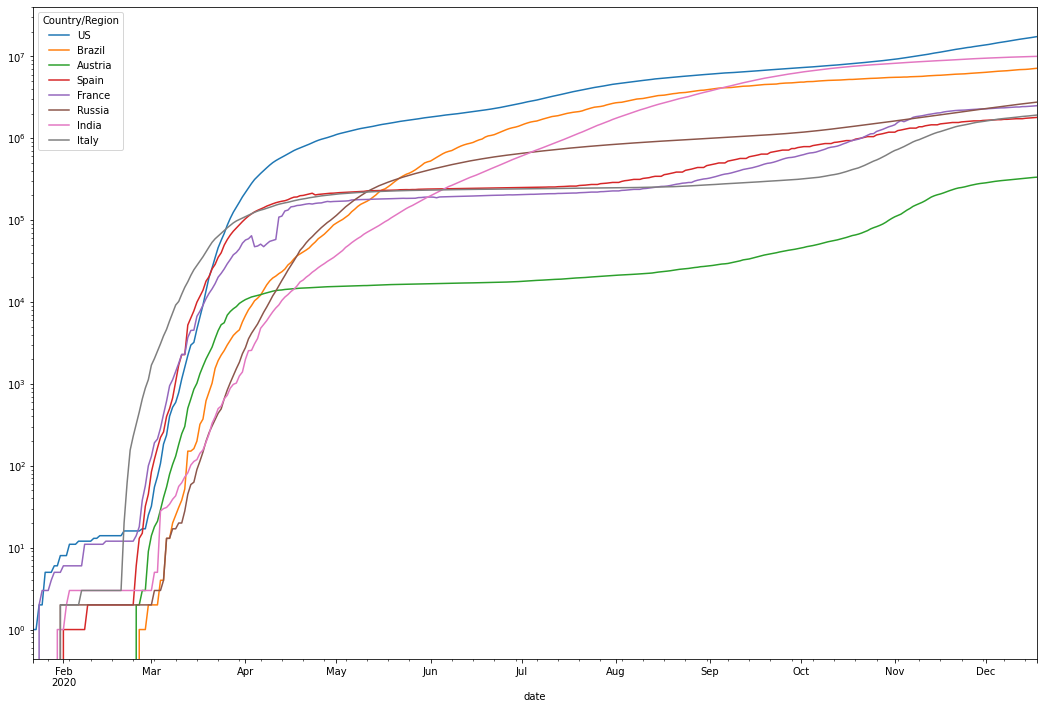

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,1969,1016,2609,79,372,5,41041,2503,908,4530,...,64500,95,612,0,960,35,1000,606,367,309
2020-12-15,1995,1028,2623,79,372,5,41204,2529,908,4648,...,65006,98,612,0,965,35,1023,606,368,310
2020-12-16,2011,1040,2631,79,379,5,41365,2556,908,4764,...,65618,102,612,0,970,35,1048,606,369,313
2020-12-17,2025,1055,2640,79,382,5,41534,2581,908,4982,...,66150,105,612,0,975,35,1078,606,369,314
2020-12-18,2030,1066,2647,80,384,5,41672,2596,908,5127,...,66640,109,612,0,979,35,1097,606,373,316


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                2814.0
Brazil             823.0
Mexico             762.0
Germany            727.0
Italy              674.0
France             612.0
Russia             602.0
United Kingdom     490.0
Poland             426.0
India              347.0
South Africa       274.0
Ukraine            269.0
Turkey             246.0
Colombia           232.0
Romania            188.0
Name: 2020-12-18 00:00:00, dtype: float64

#### Countries with the biggest numbers of deaths

In [10]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                313588
Brazil            185650
India             145136
Mexico            117249
Italy              67894
United Kingdom     66640
France             60345
Iran               53273
Russia             49170
Spain              48926
Argentina          41672
Colombia           40019
Peru               36858
Germany            25754
Poland             24771
Name: 2020-12-18 00:00:00, dtype: int64

In [11]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-12-14,1484.0,433.0,57.0,389.0,376.0,442.0,354.0,491.0
2020-12-15,2984.0,964.0,118.0,388.0,791.0,564.0,387.0,846.0
2020-12-16,3668.0,936.0,116.0,195.0,290.0,584.0,355.0,680.0
2020-12-17,3345.0,1092.0,218.0,181.0,261.0,574.0,338.0,683.0
2020-12-18,2814.0,823.0,145.0,149.0,612.0,602.0,347.0,674.0


### New Deaths (moving average, 7 days)

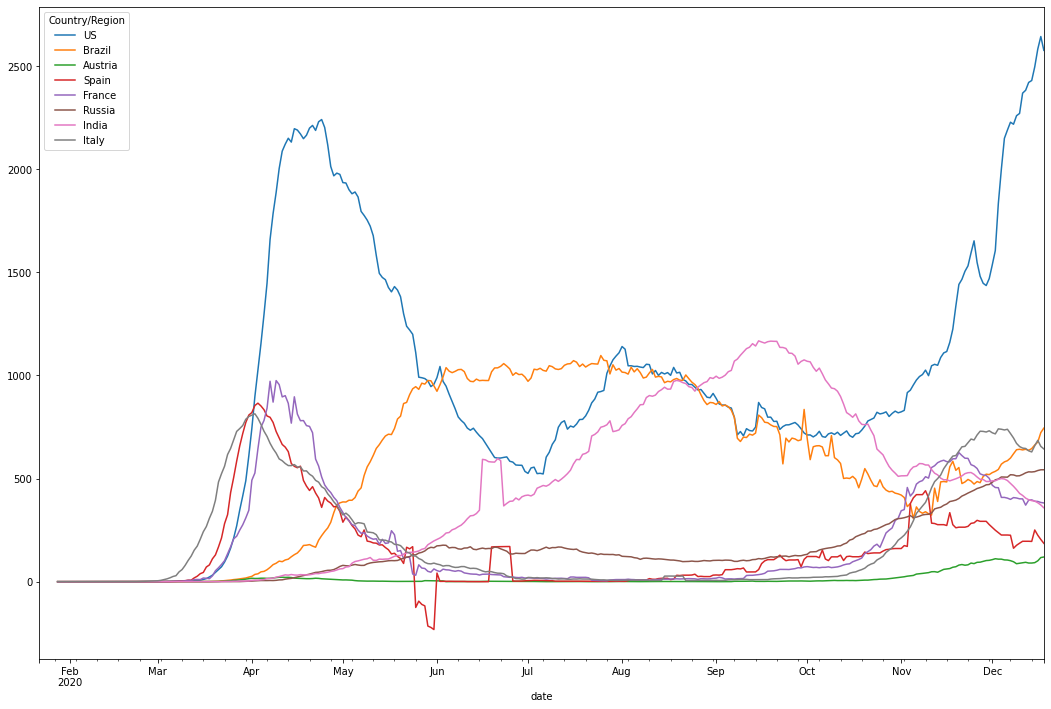

In [12]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

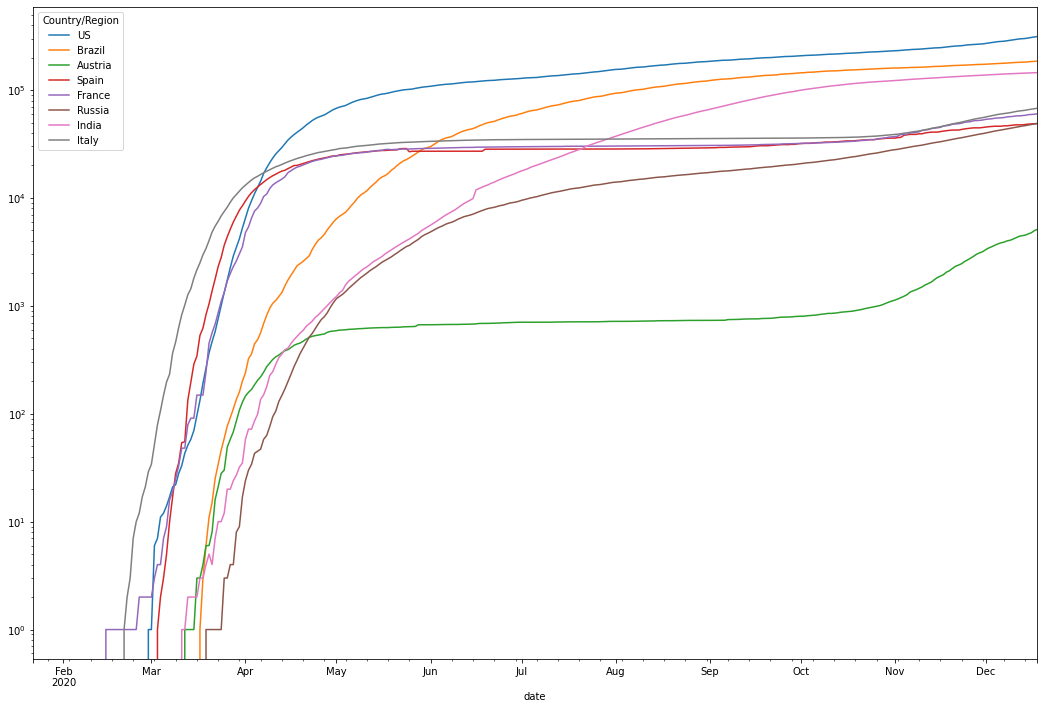

In [13]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [14]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-12-14,-6298082.0,19700.0,3068.0,0.0,655.0,18527.0,34477.0,22456.0
2020-12-15,0.0,48434.0,3576.0,0.0,1440.0,24392.0,33813.0,25789.0
2020-12-16,0.0,32709.0,3292.0,0.0,1224.0,26036.0,33291.0,34495.0
2020-12-17,0.0,62355.0,3273.0,0.0,1195.0,25854.0,31087.0,27913.0
2020-12-18,0.0,21408.0,3109.0,0.0,1289.0,25702.0,29885.0,22272.0


### New Recovered (moving average, 7 days)

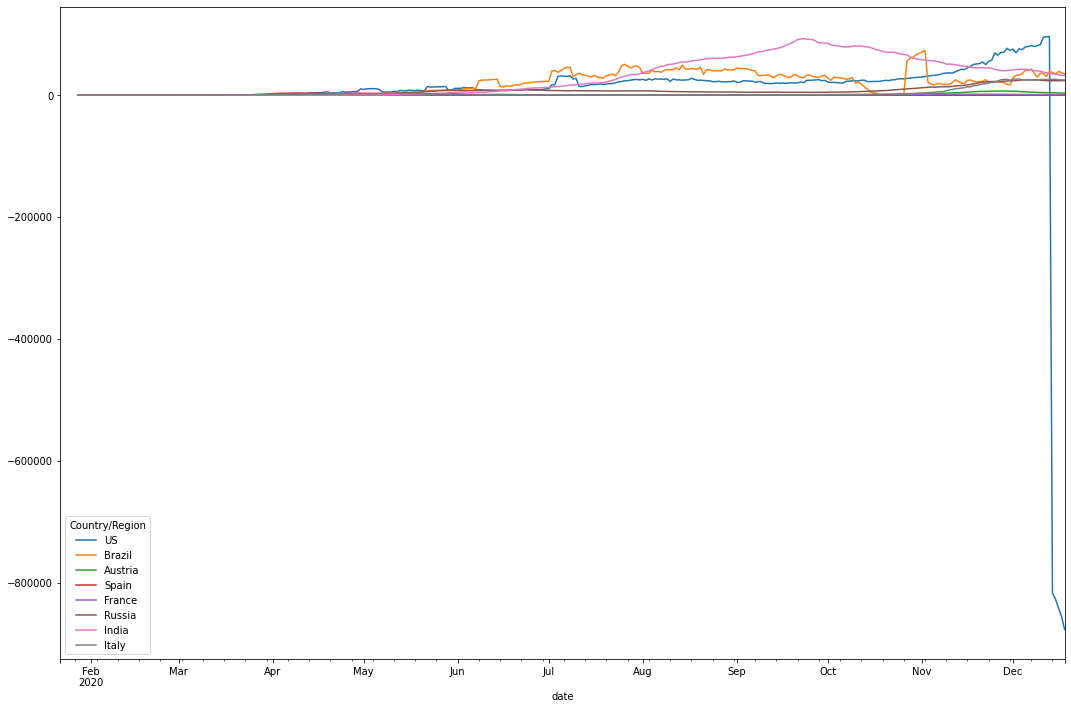

In [16]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [17]:
df_recovered.loc["2020-02-23","Italy"] = 1

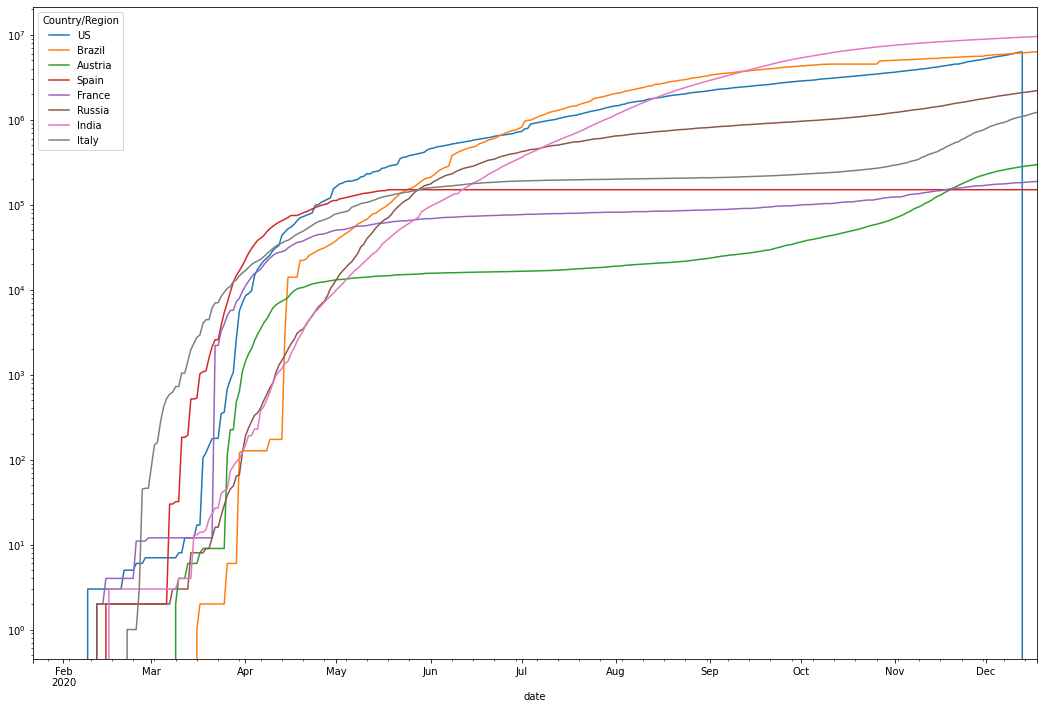

In [18]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [19]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [20]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [21]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [22]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [23]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [24]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [25]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [26]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [27]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [28]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [29]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [30]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [31]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

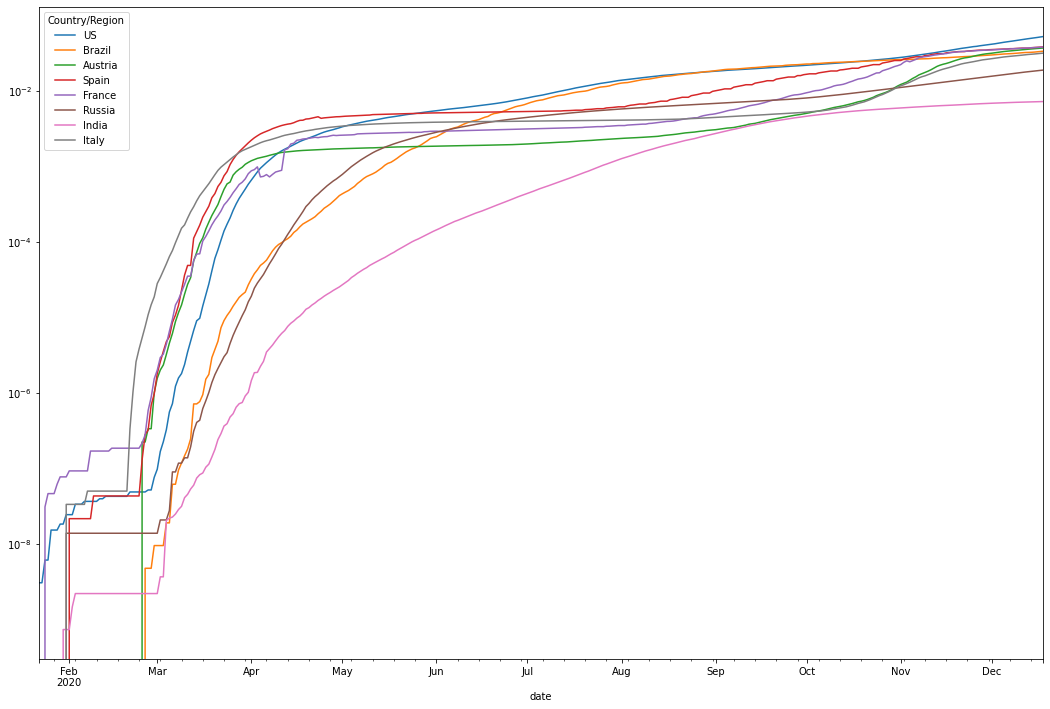

In [32]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

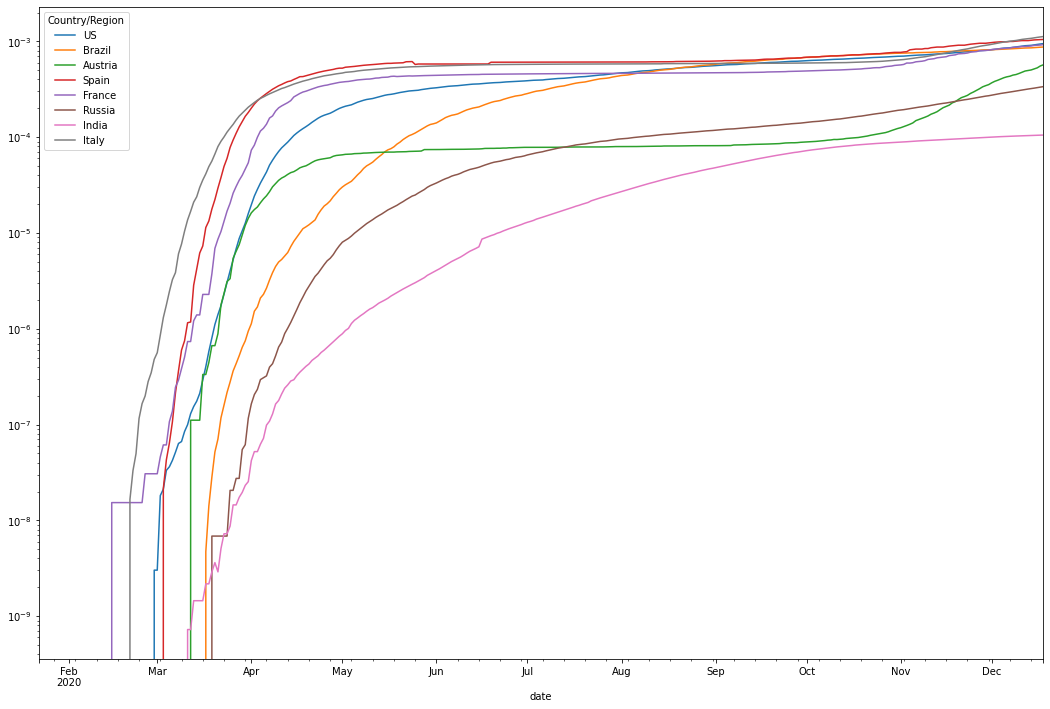

In [33]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

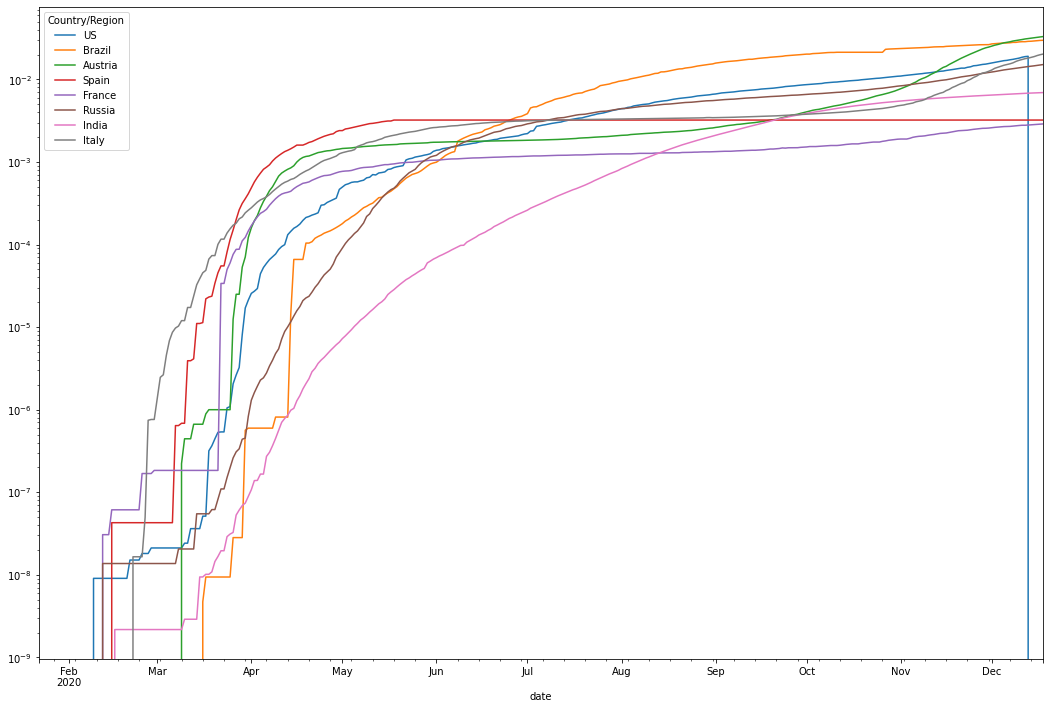

In [34]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

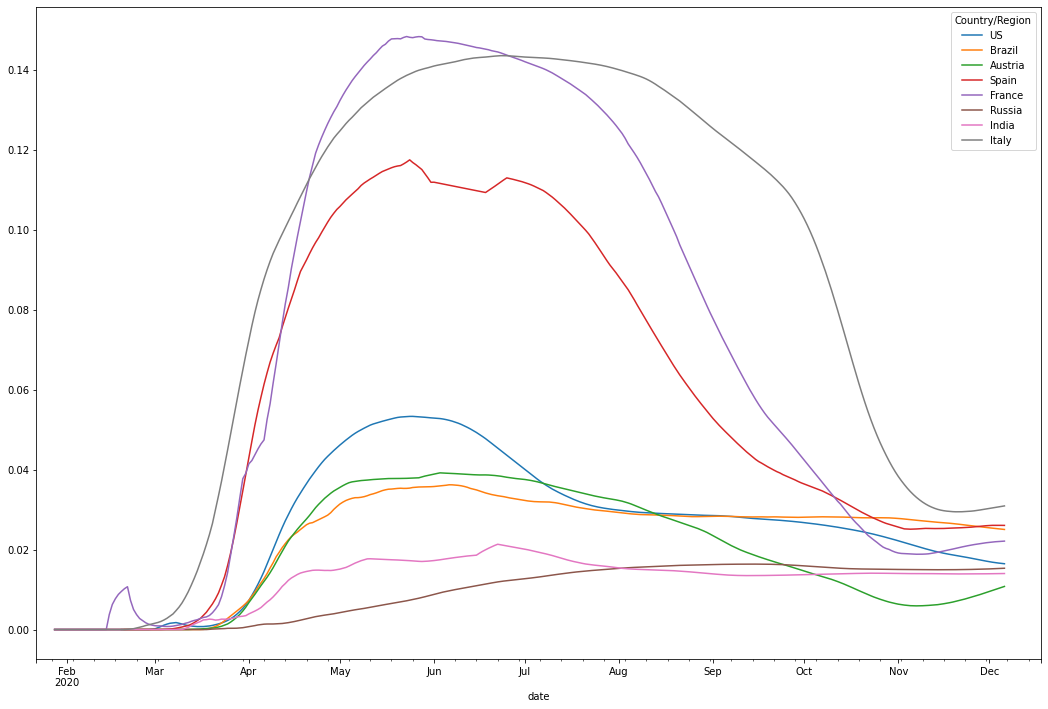

In [35]:
ratio = df_deaths/df_cases.shift(-12)
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()